**Elementos de treliça**

In [22]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math as m

In [23]:
x = sp.Symbol('x')

In [24]:
numero_de_nos = 16
numero_de_elementos = 38

dimensao = 2
dimensao_global = 2

força_nos = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1] # 0 se não há força aplicada, 1 se há
forca_nos_2D = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,-20000],[0,0],[0,0],[0,0],[0,-20000]] # [direção X, direção Y]

condicoes_de_contorno_moveis = sp.Matrix([[0,0], [1,1], [1,1], [1,1], [1,1], [1,1], [1,1], [0,0], [1,1], [1,1], [1,1], [1,1], [1,1], [0,0], [1,1],
                                          [1,1]]) # 0 para fixo, 1 para móvel

matriz_de_compatibilidade = [[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[1,9],[2,10],[3,11],[4,12],[5,13],[2,8],[3,9],[4,10],[5,11],[6,12],[1,8],[2,9],
                             [3,10],[4,11],[5,12],[6,13],[7,13],[8,9],[9,10],[10,11],[11,12],[12,13],[8,15],[9,16],[9,14],[10,15],[11,16],[8,14],
                             [9,15],[10,16],[14,15],[15,16]]

matriz_de_coordenadas = [[0,10/6],[20/6,10/6],[40/6,10/6],[60/6,10/6],[80/6,10/6],[100/6,10/6],[120/6,10/6],[0,0],[20/6,0],[40/6,0],[60/6,0],[80/6,0],
                         [100/6,0],[0,-10/6],[20/6,-10/6],[40/6,-10/6]]

ρ = [2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750,
     2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750, 2750] # massa específica do elemento

g = 9.80665 # módulo da gravidade local

W = sp.Matrix([[30000,30000,30000,30000,30000,30000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]) # carga distribuída no sistema de coordenadas do elemento

E = [70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9,
     70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9, 70e9]

A = [4.2e-2, 4.2e-2, 4.2e-2, 4.2e-2, 4.2e-2, 4.2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 4.2e-2, 4.2e-2, 4.2e-2, 4.2e-2, 4.2e-2,
     4.2e-2, 2e-2, 4.2e-2, 4.2e-2, 4.2e-2, 4.2e-2, 4.2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 2e-2, 4.2e-2, 4.2e-2, 4.2e-2, 4.2e-2, 4.2e-2] 

Fator_de_escala = 800 # apenas para visualização dos deslocamentos

In [25]:
def plot_reta_continua(ponto1, ponto2):
    x = [ponto1[0], ponto2[0]]
    y = [ponto1[1], ponto2[1]]
    
    plt.plot(x, y, marker='o', c='black')

def plot_reta_tracejada(ponto1, ponto2):
    x = [ponto1[0], ponto2[0]]
    y = [ponto1[1], ponto2[1]]
    
    plt.plot(x, y, '--', marker = 'o', c='#C1BEBF')

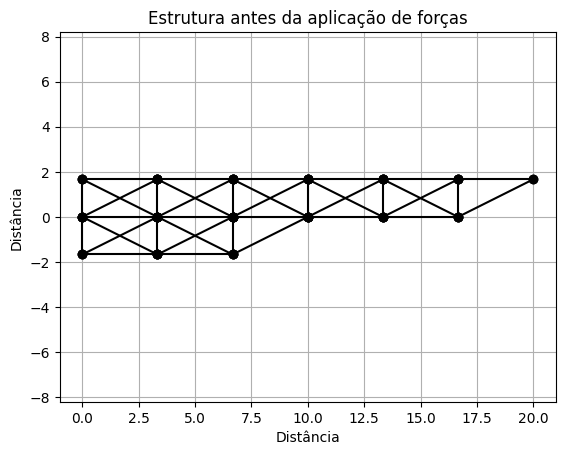

In [26]:
for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j= matriz_de_compatibilidade[k][1]
    plot_reta_continua(matriz_de_coordenadas[i-1], matriz_de_coordenadas[j-1])
plt.title('Estrutura antes da aplicação de forças')
plt.xlabel('Distância')
plt.ylabel('Distância')
plt.axis('equal')
plt.grid()
plt.show() 

In [27]:
for i in range(numero_de_elementos):
    θ = (np.array([sp.symbols(f"θ{i}") for i in range(1, numero_de_elementos+1)]))

seno, cosseno, L = [], [], []
for i in range(numero_de_elementos):
    j, k = matriz_de_compatibilidade[i][0]-1, matriz_de_compatibilidade[i][1]-1
    L.append(np.sqrt((matriz_de_coordenadas[j][0]-matriz_de_coordenadas[k][0])**2 + (matriz_de_coordenadas[j][1]-matriz_de_coordenadas[k][1])**2))
    seno.append(-(matriz_de_coordenadas[j][1]-matriz_de_coordenadas[k][1])/L[i])
    cosseno.append(-(matriz_de_coordenadas[j][0]-matriz_de_coordenadas[k][0])/L[i])

for k in range(numero_de_elementos):
    θ[k] = m.atan2(seno[k],cosseno[k])

def K(E,A,L):
    return(E*A/L)

In [28]:
carga, peso_distribuido, centroide_carga, centroide_peso = [], [], [], []
for i in range(numero_de_elementos):
    carga.append(sp.integrate(W[0,i], (x, 0, L[i])))
    peso_distribuido.append(sp.integrate(ρ[i]*A[i]*g, (x, 0, L[i])))
    centroide_carga.append(sp.integrate(W[0,i]*x, (x, 0, L[i]))/sp.integrate(W[0,i], (x, 0, L[i])))
    centroide_peso.append(sp.integrate(ρ[i]*A[i]*g*x, (x, 0, L[i]))/sp.integrate(ρ[i]*A[i]*g, (x, 0, L[i])))

R1, R1p, R2, R2p = sp.symbols('R1 R1p R2 R2p')
R1_vec, R1_peso_vec, R2_vec, R2_peso_vec = [], [], [], []

if np.all(W == 0):
    carga_valor = False
else:
    carga_valor = True

if carga_valor == True:
    for k in range(numero_de_elementos):
        if W[k] != 0:
            equilibrio_vertical = sp.Eq(R1 + R2, carga[k])
            equilibrio_momento = sp.Eq(-R1*L[k]+carga[k]*(L[k]-centroide_carga[k]), 0)
            solucao = sp.solve([equilibrio_vertical, equilibrio_momento], (R1, R2))
            R1_vec.append(solucao[R1])
            R2_vec.append(solucao[R2])
        else:
            R1_vec.append(0)
            R2_vec.append(0)

elif carga_valor == False:
    R1_vec = np.zeros(numero_de_elementos)
    R2_vec = np.zeros(numero_de_elementos)

if g != 0:
    for k in range(numero_de_elementos):
        equilibrio_vertical_peso = sp.Eq(R1p + R2p, peso_distribuido[k])
        equilibrio_momento_peso = sp.Eq(-R1p*L[k]+peso_distribuido[k]*(L[k]-centroide_peso[k]), 0)
        solucao_peso = sp.solve([equilibrio_vertical_peso, equilibrio_momento_peso], (R1p, R2p))
        R1_peso_vec.append(solucao_peso[R1p])
        R2_peso_vec.append(solucao_peso[R2p])

elif g == 0:
    R1_peso_vec = np.zeros(numero_de_elementos)
    R2_peso_vec = np.zeros(numero_de_elementos)

In [29]:
Fx_sistema_global, Fy_sistema_global = np.zeros(numero_de_nos), np.zeros(numero_de_nos)
Fx_sistema_calculo_1, Fx_sistema_calculo_2, Fy_sistema_calculo_1, Fy_sistema_calculo_2 = [], [], [], []

for i in range(numero_de_elementos):
    Fx_sistema_calculo_1.append(-R1_vec[i]*seno[i])
    Fx_sistema_calculo_2.append(-R2_vec[i]*seno[i])
    Fy_sistema_calculo_1.append(R1_vec[i]*cosseno[i]-R1_peso_vec[i])
    Fy_sistema_calculo_2.append(R2_vec[i]*cosseno[i]-R2_peso_vec[i])

for i in range(numero_de_elementos):
    k = matriz_de_compatibilidade[i][0]
    Fx_sistema_global[k-1] += Fx_sistema_calculo_1[i]
    Fy_sistema_global[k-1] += Fy_sistema_calculo_1[i]

for i in range(numero_de_elementos):
    k = matriz_de_compatibilidade[i][1]
    Fx_sistema_global[k-1] += Fx_sistema_calculo_2[i]
    Fy_sistema_global[k-1] += Fy_sistema_calculo_2[i]
    

In [30]:
vetores_de_força, vetores_de_deslocamento_editavel_1, vetores_de_deslocamento, vetor_de_rigidez = [],[],[],[]

for i in range(1, numero_de_elementos+1):
    vetor_de_rigidez.append(K(E[i-1],A[i-1],L[i-1]))

vetor_de_rigidez_simbolico = np.array([sp.symbols(f"k{i}") for i in range(1, numero_de_elementos+1)])         

for _ in range(numero_de_elementos):

    forças = ''.join((i + str(j)) for i, j in zip('f' * (numero_de_nos), range(1, numero_de_nos+1)))
    deslocamentos = ''.join((i + str(j)) for i, j in zip('u' * (numero_de_nos), range(1, numero_de_nos+1)))

    u = np.array([sp.symbols(f"u{i}") for i in range(1, numero_de_nos+1)])
    d = np.array([sp.symbols(f"d{i}") for i in range(1, numero_de_nos+1)])

    vetores_de_deslocamento_editavel_1.append(d)
    vetores_de_deslocamento.append(u)

f = (np.array([sp.symbols(f"f{i}") for i in range(1, numero_de_nos+1)]))

for k in range(len(força_nos)):
    if força_nos[k] != 0:
        f[k] = força_nos[k] 

vetores_de_força = f

for i, j in zip(range(0,numero_de_elementos), range(0,numero_de_elementos)):
    for k in range(0,2):
        vetores_de_deslocamento_editavel_1[i][k] = condicoes_de_contorno_moveis[matriz_de_compatibilidade[j][k]-1]

for i in range(0, numero_de_elementos):
    for k in range(1,numero_de_nos+1):
        if k != matriz_de_compatibilidade[i][0] and k != matriz_de_compatibilidade[i][1]: 
            vetores_de_deslocamento[i][k-1] = 0

In [31]:
vetor_de_deslocamento_finais = []
soma = sp.zeros(1,numero_de_nos)

for j in range(numero_de_nos):
    for k in range(numero_de_elementos):
        if vetores_de_deslocamento[k][j] != 0:
            soma[j] = vetores_de_deslocamento[k][j]
            break
for i in range(numero_de_nos):
    vetor_de_deslocamento_finais.append(soma[i]*condicoes_de_contorno_moveis[i]) 

matrizes_de_rigidez, matrizes_de_rigidez_simbolicas = [], [] 

for i in range(1,numero_de_elementos+1):
    matriz_de_rigidez_local =  (np.diag([1]*dimensao) - 1*np.ones((dimensao,dimensao)) - np.diag([-1]*dimensao))*vetor_de_rigidez[i-1]
    matriz_de_rigidez_local_simbolica =  (np.diag([1]*dimensao) - 1*np.ones((dimensao,dimensao)) - np.diag([-1]*dimensao))*vetor_de_rigidez_simbolico[i-1]
    matrizes_de_rigidez.append(matriz_de_rigidez_local)
    matrizes_de_rigidez_simbolicas.append(matriz_de_rigidez_local_simbolica) 

matriz_de_rigidez_global_local = []
for k in range(numero_de_elementos):
    R = [[cosseno[k], seno[k], 0, 0],[0, 0, cosseno[k], seno[k]]]
    Matriz_1 = np.matmul(np.transpose(R), matrizes_de_rigidez[k])
    matriz_de_rigidez_global_local.append(np.matmul(Matriz_1,R))

matriz_de_rigidez_global_sistema = np.zeros((dimensao_global*numero_de_nos, dimensao_global*numero_de_nos))
for i in range(numero_de_elementos):
    ln = [matriz_de_compatibilidade[i][0]*2-2, matriz_de_compatibilidade[i][0]*2-1, matriz_de_compatibilidade[i][1]*2-2, matriz_de_compatibilidade[i][1]*2-1]
    for j, p in zip(ln, range(len(matriz_de_rigidez_global_local[i][0]))):
        for k, n in zip(ln, range(len(matriz_de_rigidez_global_local[i][0]))):
            matriz_de_rigidez_global_sistema[j][k] = matriz_de_rigidez_global_sistema[j][k] + matriz_de_rigidez_global_local[i][p][n]


In [32]:
vetor_forca_2D = []
for i in range(numero_de_nos):
    for j in range(dimensao_global):
        vetor_forca_2D.append(forca_nos_2D[i][j])

for i in range(numero_de_nos):
    vetor_forca_2D[i*2] += Fx_sistema_global[i]
    vetor_forca_2D[i*2+1] += Fy_sistema_global[i]

vetor_forca_2D = np.array(vetor_forca_2D)

U = []
for i in range(1, numero_de_nos+1):
    U.append(sp.symbols(f"U{i}x"))
    U.append(sp.symbols(f"U{i}y"))

U_calculo_1, U_calculo_2 = U.copy(), []
no_fixo_movel = []

for k in range(numero_de_nos):
    no_fixo_movel.append(condicoes_de_contorno_moveis[k,0])
    no_fixo_movel.append(condicoes_de_contorno_moveis[k,1])

for j in range(dimensao_global*numero_de_nos):
    U_calculo_2.append(U_calculo_1[j]*no_fixo_movel[j])

contador_final_global = []

for i in range(dimensao_global*numero_de_nos):
    if U_calculo_2[i] == 0:
        contador_final_global.append(i)
        
matriz_de_rigidez_global_sistema_reajustada_1 = np.delete(matriz_de_rigidez_global_sistema, contador_final_global, axis=0)
matriz_de_rigidez_global_sistema_reajustada_2 = np.delete(matriz_de_rigidez_global_sistema_reajustada_1, contador_final_global, axis=1)

vetor_forca_2D_calculo  = vetor_forca_2D.copy()
vetor_forca_2D_calculo = np.delete(vetor_forca_2D_calculo, contador_final_global, axis=0)
matriz_de_rigidez_global_sistema_reajustada_2 = matriz_de_rigidez_global_sistema_reajustada_2.astype(float) 
vetor_forca_2D_calculo = vetor_forca_2D_calculo.astype(float)
U_calculo_preliminar = np.linalg.solve(matriz_de_rigidez_global_sistema_reajustada_2,vetor_forca_2D_calculo)

contador_float = np.linspace(0,dimensao_global*numero_de_elementos -1,num=dimensao_global*numero_de_elementos)
contador_inteiro = [int(elemento) for elemento in contador_float]

contador_inteiro_inicial_set = set(contador_inteiro)
contador_inteiro_final_set = set(contador_final_global)
diferenca = contador_inteiro_inicial_set-contador_inteiro_final_set     


In [33]:
for i, k in zip(diferenca, range(len(U_calculo_preliminar))):
        U[i] = U_calculo_preliminar[k]  
for j in contador_final_global:
        U[j] = 0   

Ux, Uy = [], []
for i in range(int(len(U)/dimensao_global)):
    Ux.append(U[2*i])
    Uy.append(U[2*i+1])

U_final = np.zeros(((numero_de_nos, dimensao_global)))

for k in range(numero_de_nos):
    U_final[k][0] = Ux[k]
    U_final[k][1] = Uy[k]

F = np.matmul(matriz_de_rigidez_global_sistema, U)

matriz_de_coordenadas_finais = matriz_de_coordenadas + U_final

In [34]:
coletor = []

for k in range(numero_de_nos):
    coletor.append(np.sqrt(Ux[k]**2+Uy[k]**2))

deslocamento_maximo = np.max(coletor)

Fator_de_escala_calculo = Fator_de_escala*deslocamento_maximo

matriz_de_coordenadas_finais_em_escala = matriz_de_coordenadas + U_final*Fator_de_escala_calculo

In [35]:
Ux_sistema_local, Uy_sistema_local = [], []
for k in range(numero_de_elementos):
    for i in matriz_de_compatibilidade[k]:
        Ux_sistema_local.append(Ux[i-1]*cosseno[k]-Uy[i-1]*seno[k])
        Uy_sistema_local.append(Ux[i-1]*seno[k]+Uy[i-1]*cosseno[k])

In [36]:
elongamento = []

def elongamento_formula(u1, u2, L):
    return((u2-u1)/L)

for i in range(numero_de_elementos):
    if (θ[i] == 0): 
        elongamento.append(elongamento_formula(Ux_sistema_local[2*i], Ux_sistema_local[2*i+1], L[i]))
    elif θ[i] > 0 and (θ[i] < np.pi/2):
        elongamento.append(elongamento_formula(Uy_sistema_local[2*i], Uy_sistema_local[2*i+1], L[i]))
    elif θ[i] >= np.pi/2:
        elongamento.append(-elongamento_formula(Ux_sistema_local[2*i], Ux_sistema_local[2*i+1], L[i]))
    elif (θ[i] < 0):
        elongamento.append(-elongamento_formula(Uy_sistema_local[2*i], Uy_sistema_local[2*i+1], L[i]))

def tensao(E, elongamento):
    return E*elongamento

tensao_elementos = []
for i in range(numero_de_elementos):
    tensao_elementos.append(tensao(E[i],elongamento[i]))

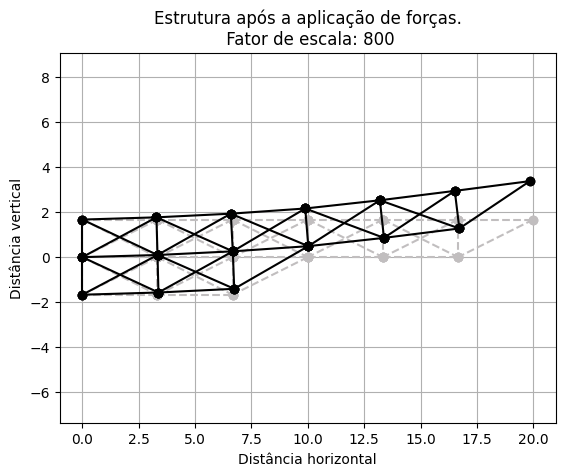

In [37]:
for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j= matriz_de_compatibilidade[k][1]
    plot_reta_tracejada(matriz_de_coordenadas[i-1], matriz_de_coordenadas[j-1])
    
for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j= matriz_de_compatibilidade[k][1]
    plot_reta_continua(matriz_de_coordenadas_finais_em_escala[i-1], matriz_de_coordenadas_finais_em_escala[j-1])

plt.title('Estrutura após a aplicação de forças.\n Fator de escala: {}'.format(Fator_de_escala))
plt.xlabel('Distância horizontal')
plt.ylabel('Distância vertical')
plt.axis('equal')
plt.grid()
plt.show() 

In [38]:
print(f"{"\033[1m\033[91m"}{'Resultados da análise utilizando elementos de treliça:'}{"\033[0m"}")

print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")

for i, j in zip(range(numero_de_nos), range(numero_de_elementos)):
    print("\nDeslocamento do nó {} na direção X: {}".format(i+1,U[2*i]))
    print("Deslocamento do nó {} na direção Y: {}".format(i+1,U[2*i+1]))
    print("\nPosição inicial do nó: X = {}, Y = {}".format(matriz_de_coordenadas[i][0],matriz_de_coordenadas[i][1]))
    print("Posição final do nó: X = {}, Y = {}".format(matriz_de_coordenadas_finais[i][0], matriz_de_coordenadas_finais[i][1]))
    print("\nForça do nó {} na direção X: {}".format(i+1,F[2*i]))
    print("Força do nó {} na direção Y: {}".format(i+1,F[2*i+1]))
    print("\nTensão no elemento {}: {}".format(j+1, tensao_elementos[j]))
    print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")


print('\nA matriz de rigidez do sistema é: \n \n {} \n'.format(matriz_de_rigidez_global_sistema))

print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")



Resultados da análise utilizando elementos de treliça:
________________________________________________________________________________

Deslocamento do nó 1 na direção X: 0
Deslocamento do nó 1 na direção Y: 0

Posição inicial do nó: X = 0, Y = 1.6666666666666667
Posição final do nó: X = 0.0, Y = 1.6666666666666667

Força do nó 1 na direção X: 1458936.7216701752
Força do nó 1 na direção Y: -187907.9525306519

Tensão no elemento 1: -25788590.87163979
________________________________________________________________________________

Deslocamento do nó 2 na direção X: -0.001228028136744752
Deslocamento do nó 2 na direção Y: 0.002675884436636178

Posição inicial do nó: X = 3.3333333333333335, Y = 1.6666666666666667
Posição final do nó: X = 3.3321053051965888, Y = 1.6693425511033029

Força do nó 2 na direção X: 2.3283064365386963e-10
Força do nó 2 na direção Y: 93270.45221794107

Tensão no elemento 2: -19945358.163357183
______________________________________________________________________

In [39]:
#%reset -f